In [275]:
#                      x    y
actions = {"droite" : (+1 , 0),
           "gauche" : (-1 , 0),
           "bas"    : ( 0 , -1),
           "haut"   : ( 0 , +1)}

class environnement:
    def __init__(self):
        self.x_max = 4
        self.x_min = 0
        self.y_max = 4
        self.y_min = 0
    def get_next_position(self, current_x,current_y, action :str):
        # action = "haut" / "bas" ...
        move_x = actions[action][0]
        move_y = actions[action][1]
        next_x = current_x + move_x
        next_y = current_y + move_y
        if next_x < self.x_min: next_x = self.x_min
        if next_y < self.y_min: next_y = self.y_min
        if next_x > self.x_max: next_x = self.x_max
        if next_y > self.y_max: next_y = self.y_max
        return next_x, next_y
    
    def get_reward(self, x, y):
        pieges = [(0,1), (1,1), (2, 1)]
        but    = [(2,2)]
        if (x,y) in pieges : return -1
        if (x,y) in but    : return 10
        return 0
        
    def est_fini(self, x,y):
        return self.get_reward(x,y) in [-1, 10]
    
    def get_etape(self, current_x, current_y, action):
        next_x, next_y = self.get_next_position(current_x, current_y, action)
        reward         = self.get_reward(next_x, next_y)
        est_fini       = self.est_fini(next_x, next_y)
        return (next_x, next_y, reward, est_fini)

In [276]:
class agent:
    def __init__(self):
        self.actions    = ["droite" , "gauche", "bas", "haut"]
        self.q_function = {(x,y):{ "droite" : 0, 
                                   "gauche" : 0, 
                                   "bas"    : 0, 
                                   "haut"   : 0} for x in range(5) for y in range(5) }
        self.current_x =0
        self.current_y =0
    def reset_position(self):
        self.current_x =0
        self.current_y =0
    def get_action(self):
        import random
        return random.choice(self.actions)
        

In [277]:
def create_episode(env, agent):
    episode = []
    fini    = env.est_fini(agent.current_x, agent.current_y)
    max_iter = 1000
    
    while not fini and max_iter>0:
        current_x, current_y         = agent.current_x, agent.current_y
        next_action                  = agent.get_action()
        next_x, next_y, reward, fini = env.get_etape(agent.current_x, agent.current_y, next_action)
        agent.current_x = next_x
        agent.current_y = next_y
        episode.append({  "current_x"   : current_x, 
                          "current_y"   : current_y, 
                          "next_action" : next_action, 
                          "reward"      : reward, 
                          "fini"        : fini })
        max_iter -=1
    return episode
        
        

        

In [278]:
import pprint

In [279]:
a           = agent()
env         = environnement()
rewards = []
for Nieme_episode in range(200000):
    a.reset_position()
    episode     = create_episode(env, a)
    last_reward = episode[-1]["reward"]
    episode, last_reward
    for  dico in episode:
        x      = dico["current_x"  ]
        y      = dico["current_y"  ]
        action = dico["next_action"]
        a.q_function[(x,y)][action] += last_reward 
    rewards.append(last_reward)

In [280]:
a.q_function

{(0, 0): {'droite': -74648,
  'gauche': -100271,
  'bas': -100485,
  'haut': -124244},
 (0, 1): {'droite': 0, 'gauche': 0, 'bas': 0, 'haut': 0},
 (0, 2): {'droite': 935, 'gauche': 608, 'bas': -237, 'haut': 963},
 (0, 3): {'droite': 2764, 'gauche': 2230, 'bas': 1252, 'haut': 2255},
 (0, 4): {'droite': 3389, 'gauche': 2885, 'bas': 2616, 'haut': 2699},
 (1, 0): {'droite': -465, 'gauche': -38514, 'bas': -29098, 'haut': -47698},
 (1, 1): {'droite': 0, 'gauche': 0, 'bas': 0, 'haut': 0},
 (1, 2): {'droite': 2100, 'gauche': 409, 'bas': -202, 'haut': 1075},
 (1, 3): {'droite': 4089, 'gauche': 2692, 'bas': 2447, 'haut': 3256},
 (1, 4): {'droite': 5025, 'gauche': 3750, 'bas': 3826, 'haut': 3693},
 (2, 0): {'droite': 30315, 'gauche': -12029, 'bas': -111, 'haut': -19437},
 (2, 1): {'droite': 0, 'gauche': 0, 'bas': 0, 'haut': 0},
 (2, 2): {'droite': 0, 'gauche': 0, 'bas': 0, 'haut': 0},
 (2, 3): {'droite': 5517, 'gauche': 4819, 'bas': 9420, 'haut': 5562},
 (2, 4): {'droite': 6999, 'gauche': 5956, 'b

In [281]:
def get_policy(q_function):
    policy = {}
    for x_y in q_function.keys():
        dico        = q_function[x_y]
        (action, _) = sorted([(k, dico[k]) for k in dico.keys()], key=lambda tuple_: tuple_[1])[-1]
        policy[x_y] = action
    return policy

In [282]:
policy = get_policy(a.q_function)

In [283]:
import random

In [284]:
positions = []
x_alea, y_alea = random.randint(0, 4), random.randint(0, 4)

a.current_x = x_alea
a.current_y = y_alea

while not env.est_fini(a.current_x, a.current_y):
    je_joue                  = policy [(a.current_x, a.current_y)]
    print(a.current_x, a.current_y, je_joue, end="\t")
    a.current_x, a.current_y = env.get_next_position(a.current_x, a.current_y, je_joue)
    reward                   = env.get_reward(a.current_x, a.current_y)
    print("reward = ",  reward )
    

3 2 gauche	reward =  10


In [285]:
a.current_x, a.current_y = env.get_next_position(a.current_x, a.current_y, je_joue)


In [286]:
import pandas as pd

In [287]:
from matplotlib import pyplot as plt
import numpy as np
cmap = plt.get_cmap('viridis')
names = ["droite", "gauche", "bas", "haut"]
colors = cmap(np.linspace(0, 1, len(names)))

In [288]:
df_pi         = pd.DataFrame.from_dict(policy , orient="index").reset_index()
df_pi.columns = ["position", "action"]

df_pi["x"] = df_pi.position.map(lambda x : x[0])
df_pi["y"] = df_pi.position.map(lambda x : x[1])
colors = {"droite": "green", "haut":"blue", "gauche":"cyan", "bas":"yellow"}
colors = {"droite": 1, "haut":2, "gauche":3, "bas":4}

df_pi.action = df_pi.action.map(colors)

In [289]:
pivot = df_pi.pivot_table(index="y", columns="x", values="action", )
pivot = pivot.sort_index(ascending=False)

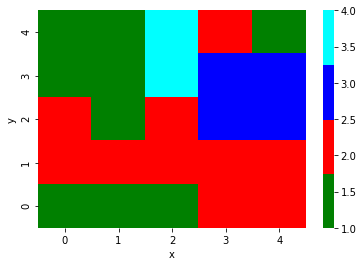

In [290]:
import seaborn as sns
sns.heatmap(pivot, cmap=["green", "red", "blue", "cyan"])

In [291]:
policy

{(0, 0): 'droite',
 (0, 1): 'haut',
 (0, 2): 'haut',
 (0, 3): 'droite',
 (0, 4): 'droite',
 (1, 0): 'droite',
 (1, 1): 'haut',
 (1, 2): 'droite',
 (1, 3): 'droite',
 (1, 4): 'droite',
 (2, 0): 'droite',
 (2, 1): 'haut',
 (2, 2): 'haut',
 (2, 3): 'bas',
 (2, 4): 'bas',
 (3, 0): 'haut',
 (3, 1): 'haut',
 (3, 2): 'gauche',
 (3, 3): 'gauche',
 (3, 4): 'haut',
 (4, 0): 'haut',
 (4, 1): 'haut',
 (4, 2): 'gauche',
 (4, 3): 'gauche',
 (4, 4): 'droite'}